### - Exercici 1

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

Agafem un troç d'un text del diari "The New Yorker" que parla de l'últim capítol de la sèrie "Succession" i li apliquem la tokenització per tal de separar les paraules. Apliquem la funció "Alpha" per eliminar els signes de puntuació. 

In [2]:
text = "“Succession” is a show about awful people, one that accounts for, without excusing, why they are so awful. In that accounting, it sometimes offers glimpses of a counter-life: who Connor, Kendall, Roman, and Shiv might have been if they’d grown up with good-enough parents, or if they’d been set free at a formative age from the sarcophagus of ultra-wealth."

In [3]:
tokens = word_tokenize(text)
tokens = [token.lower() for token in tokens if token.isalpha()]

Calculem la freqüència de paraules.

In [4]:
fdist = FreqDist(tokens)

Grafiquem les 20 paraules més freqüents:

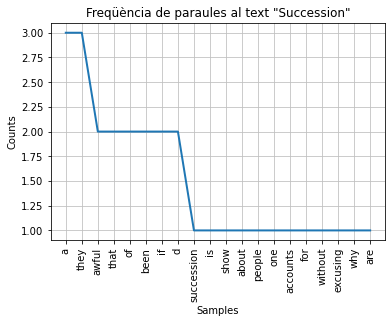

In [5]:
fdist = FreqDist(tokens)
fdist.plot(20, title='Freqüència de paraules al text "Succession"')
plt.show()

Veiem que les paraules més repetides són "a", "they" i "awful", aquesta última una paraula amb connotació molt negativa que ja fa preveure com anirà l'anàlisi de sentiment.

### - Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

Eliminem les stop words especificant que l'idioma és l'anglès. Les stop words són les paraules més comunes i menys significatives d'un text (com 'the', 'a', 'of', etc). No proporcionen informació rellevant sobre el contingut i sovint s'ignoren en l'anàlisi.

In [6]:
stop_words = set(stopwords.words('english'))
tokens_sin_stopwords = [token for token in tokens if token not in stop_words]

Després fem l'stemming, que és reduir les paraules a l'arrel comuna. Facilita l'anàlisi i redueix la complexitat de les dades. 

In [7]:
ps = PorterStemmer()
tokens_stemming = [ps.stem(token) for token in tokens_sin_stopwords]

Calculem la freqüència de paraules i mostrem les paraules més freqüents havent fet els dos pasos previs.

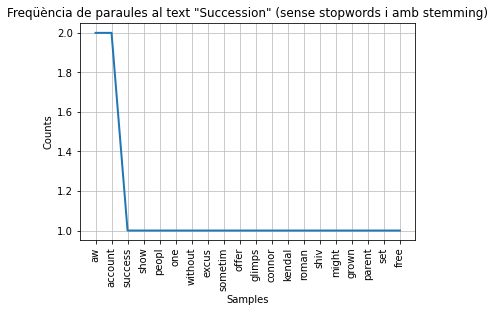

In [8]:
fdist_stemming = FreqDist(tokens_stemming)
fdist_stemming.plot(20, title='Freqüència de paraules al text "Succession" (sense stopwords i amb stemming)')
plt.show()

Veiem com ara les arrels més freqüents són "aw", "account" i "success".

### - Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)

print(sentiment)

{'neg': 0.096, 'neu': 0.851, 'pos': 0.053, 'compound': -0.4019}


En definitiva el text té un sentiment negatiu, ja que la nota mitja és de -0,4. Tot i així, en el comput el valor neutre és el més alt. 

El text relata la naturalesa horrible dels personatges i en forma condicional es pregunta com hauria sigut la seva vida si no haguéssin tingut una vida de riquesa extrema i uns pares suficientment bons. Al apareixèr alguns termes en condicional com "good-enough" o la paraula "wealth" pot fer que la nota de l'anàlisi no sigui tan negativa a l'interpretar-ho com paraules positives, per exemple. 